In [ ]:
# Initialise SQL
%load_ext sql
import sqlite3
from sqlalchemy import create_engine

# Data manipulation
import pandas as pd           # pd is the standard alias for pandas
import numpy as np            # np is the standard alias for numpy
from scipy.stats import spearmanr

# Data visualization
import matplotlib.pyplot as plt  # plt is the alias for matplotlib's pyplot
import seaborn as sns             # sns is the alias for seaborn

# Machine learning
import sklearn                   # Main scikit-learn package
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.preprocessing import StandardScaler       # Feature scaling
from sklearn.linear_model import LinearRegression       # Example model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [2]:
file_path = r"C:\Users\Julie\Desktop\London Weather\London Weather EDA\Day 3\Cleaned_LW.csv"
df = pd.read_csv(file_path)

In [7]:
cols_to_drop = []

df = df.drop(columns=cols_to_drop)

In [26]:
# Calculate the daily temperature range, aka Diurnal Temperature Range
# df['dtr'] = df['max_temp'] - df['min_temp']



In [42]:
#avg_dtr_by_season = df.groupby('season')['dtr'].mean().sort_values()

#avg_dtr_by_season.plot(kind='bar', color='coral', title='Average DTR by Season')
#plt.ylabel('DTR (°C)')
#plt.grid(axis='y')
#plt.tight_layout()
#plt.show()

In [43]:
#top5_dtr = df.nlargest(5, 'dtr')[['date', 'max_temp', 'min_temp', 'dtr']]
#print("Top 5 Highest DTR Days:\n", top5_dtr)

In [45]:
#rain_counts_by_decade.plot(kind='bar', stacked=True, figsize=(12,6),
                          #colormap='Reds')
#plt.title('Rain Intensity Counts by Decade')
#plt.xlabel('Decade')
#plt.ylabel('Number of Days')
#plt.legend(title='Rain Intensity')
#plt.tight_layout()
#lt.show()


In [48]:
print(df.columns)


Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'year', 'month_name', 'weekday', 'month', 'season', 'rain_intensity',
       'dtr', 'decade'],
      dtype='object')


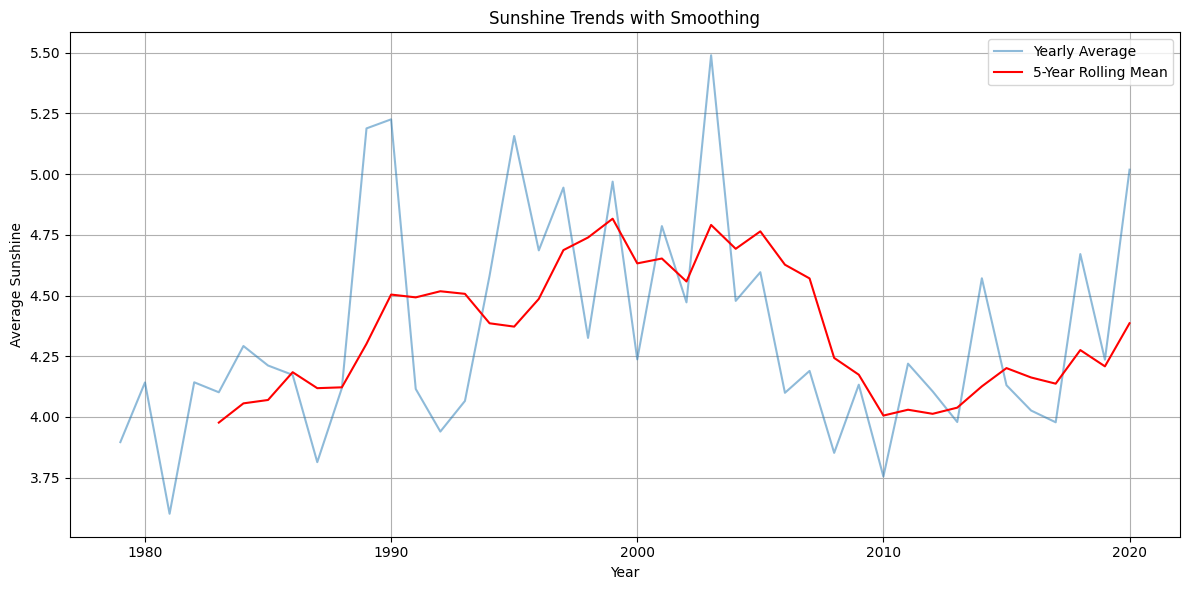

In [50]:
sunshine_yearly = df[(df['year'] >= 1979) & (df['year'] <= 2020)].groupby('year')['sunshine'].mean()

sunshine_smoothed = sunshine_yearly.rolling(window=5).mean()

plt.figure(figsize=(12,6))
sunshine_yearly.plot(alpha=0.5, label='Yearly Average')
sunshine_smoothed.plot(color='red', label='5-Year Rolling Mean')
plt.title('Sunshine Trends with Smoothing')
plt.xlabel('Year')
plt.ylabel('Average Sunshine')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

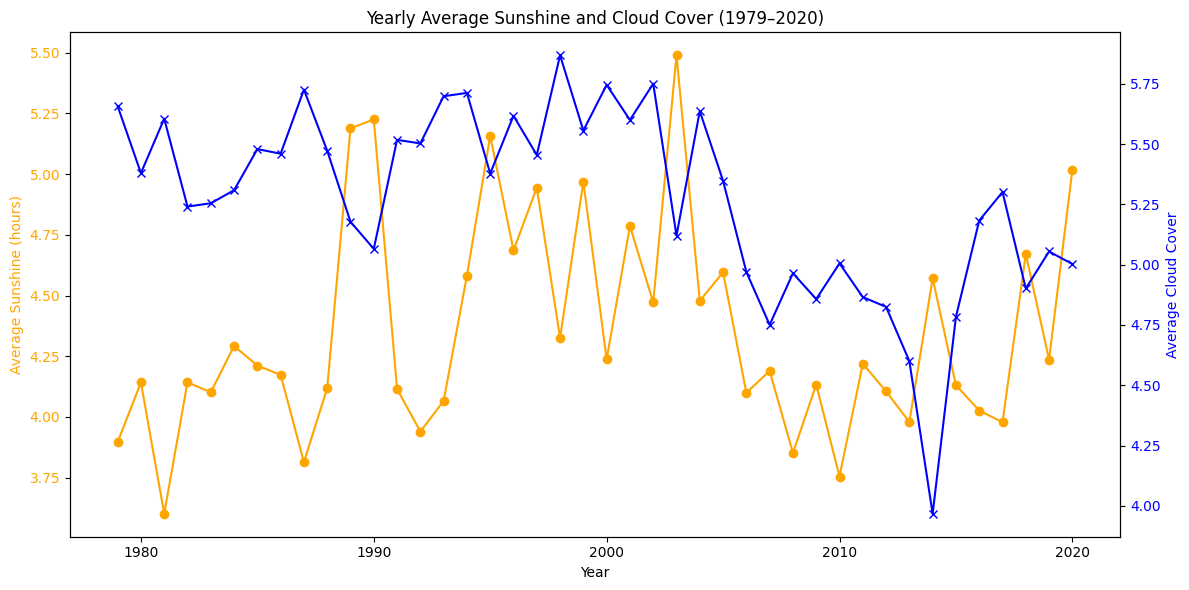

In [51]:
# Filter years if needed
subset = df[(df['year'] >= 1979) & (df['year'] <= 2020)]

# Group by year and calculate averages
yearly_summary = subset.groupby('year').agg({
    'sunshine': 'mean',
    'cloud_cover': 'mean'
}).reset_index()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot sunshine
ax1.plot(yearly_summary['year'], yearly_summary['sunshine'], color='orange', marker='o', label='Avg Sunshine (hrs)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sunshine (hours)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create second y-axis for cloud cover
ax2 = ax1.twinx()
ax2.plot(yearly_summary['year'], yearly_summary['cloud_cover'], color='blue', marker='x', label='Avg Cloud Cover')
ax2.set_ylabel('Average Cloud Cover', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Yearly Average Sunshine and Cloud Cover (1979–2020)')
fig.tight_layout()
plt.show()

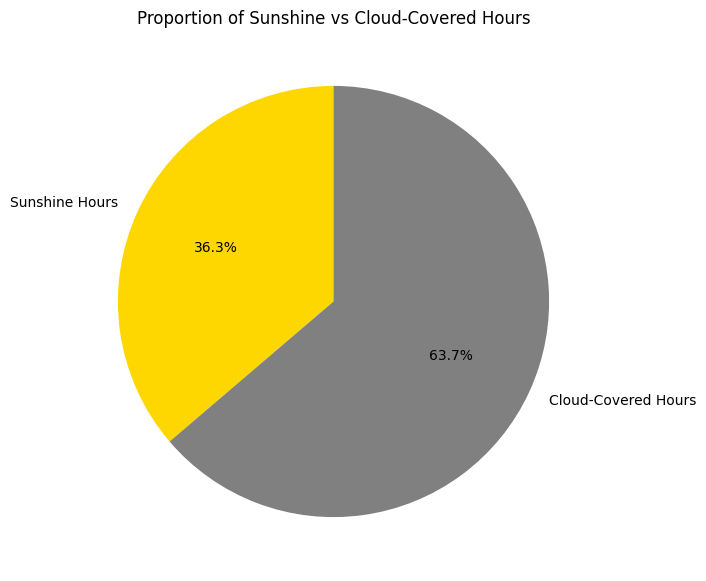

In [54]:
import matplotlib.pyplot as plt

# Assume df already has 'sunshine' column with hours of sunshine per day
df['daylight_hours'] = 12  # rough estimate
df['cloud_hours'] = df['daylight_hours'] - df['sunshine']

# Sum totals
total_sunshine = df['sunshine'].sum()
total_cloud = df['cloud_hours'].sum()

# Data for pie chart
labels = ['Sunshine Hours', 'Cloud-Covered Hours']
sizes = [total_sunshine, total_cloud]
colors = ['#FFD700', '#808080']  # gold for sun, grey for clouds

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=False)
plt.title('Proportion of Sunshine vs Cloud-Covered Hours')
plt.show()



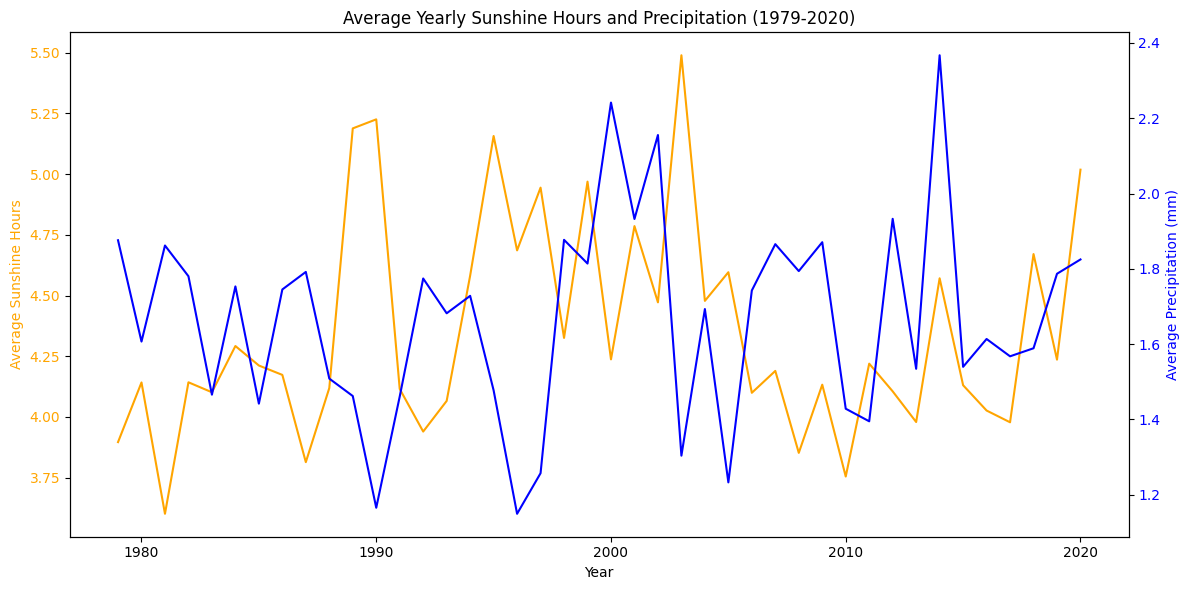

In [56]:
import matplotlib.pyplot as plt

# Filter for years 1979 to 2020
df_filtered = df[(df['year'] >= 1979) & (df['year'] <= 2020)]

# Group by year and calculate averages
yearly_avg = df_filtered.groupby('year').agg({
    'sunshine': 'mean',
    'precipitation': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot average sunshine hours
color_sun = 'orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sunshine Hours', color=color_sun)
ax1.plot(yearly_avg['year'], yearly_avg['sunshine'], color=color_sun, label='Sunshine (hrs)')
ax1.tick_params(axis='y', labelcolor=color_sun)

# Create second y-axis for precipitation
ax2 = ax1.twinx()
color_precip = 'blue'
ax2.set_ylabel('Average Precipitation (mm)', color=color_precip)
ax2.plot(yearly_avg['year'], yearly_avg['precipitation'], color=color_precip, label='Precipitation (mm)')
ax2.tick_params(axis='y', labelcolor=color_precip)

plt.title('Average Yearly Sunshine Hours and Precipitation (1979-2020)')
fig.tight_layout()
plt.show()


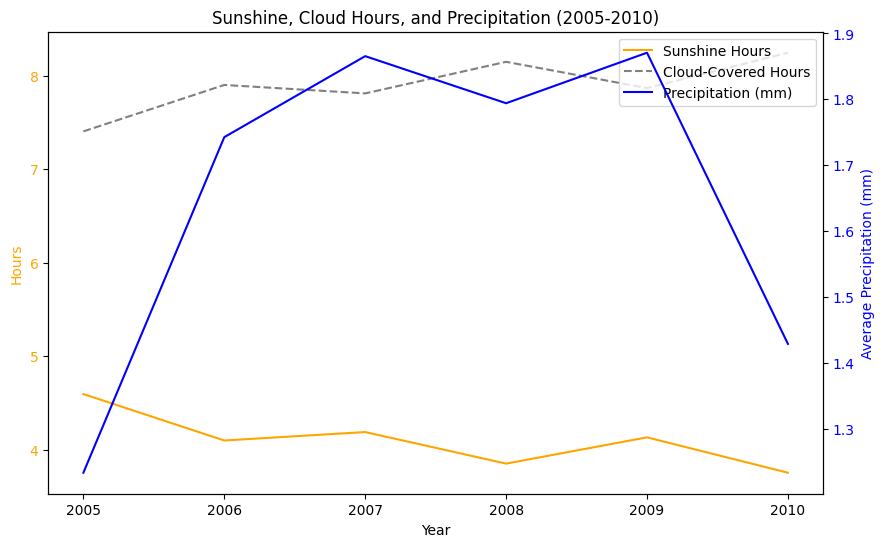

In [57]:
import matplotlib.pyplot as plt

# Filter data for 2005-2010
df_period = df[(df['year'] >= 2005) & (df['year'] <= 2010)].copy()

# Calculate cloud hours per day (assuming 12 daylight hours)
df_period['cloud_hours'] = 12 - df_period['sunshine']

# Group by year and average values
yearly_avg = df_period.groupby('year').agg({
    'sunshine': 'mean',
    'cloud_hours': 'mean',
    'precipitation': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

color_sun = 'orange'
color_cloud = 'gray'
color_precip = 'blue'

# Plot sunshine and cloud hours on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Hours', color=color_sun)
ax1.plot(yearly_avg['year'], yearly_avg['sunshine'], color=color_sun, label='Sunshine Hours')
ax1.plot(yearly_avg['year'], yearly_avg['cloud_hours'], color=color_cloud, label='Cloud-Covered Hours', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color_sun)

# Secondary y-axis for precipitation
ax2 = ax1.twinx()
ax2.set_ylabel('Average Precipitation (mm)', color=color_precip)
ax2.plot(yearly_avg['year'], yearly_avg['precipitation'], color=color_precip, label='Precipitation (mm)')
ax2.tick_params(axis='y', labelcolor=color_precip)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Sunshine, Cloud Hours, and Precipitation (2005-2010)')
plt.show()

In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Copy and filter relevant years if needed
df_gloom = df.copy()

# Calculate cloud_hours assuming 12 daylight hours
df_gloom['cloud_hours'] = 12 - df_gloom['sunshine']

# Select columns for gloom calculation
gloom_vars = ['cloud_hours', 'precipitation', 'sunshine']

# Min-Max scale the variables
scaler = MinMaxScaler()
df_gloom_scaled = pd.DataFrame(scaler.fit_transform(df_gloom[gloom_vars]), columns=gloom_vars)

# Calculate gloom: cloud_hours + precipitation - sunshine (all scaled)
df_gloom['gloom'] = df_gloom_scaled['cloud_hours'] + df_gloom_scaled['precipitation'] - df_gloom_scaled['sunshine']

# Aggregate gloom per year (mean or sum)
yearly_gloom = df_gloom.groupby('year')['gloom'].mean().reset_index()

# Calculate rolling 5-year gloom sum
yearly_gloom['gloom_5yr_sum'] = yearly_gloom['gloom'].rolling(window=5).sum()

# Show top 5 gloomiest 5-year periods
top_gloom = yearly_gloom.sort_values('gloom_5yr_sum', ascending=False).head(5)

print(top_gloom)

# Check if 2005-2010 is in the top gloom periods
print(yearly_gloom[(yearly_gloom['year'] >= 2005) & (yearly_gloom['year'] <= 2010)][['year', 'gloom']])



    year     gloom  gloom_5yr_sum
4   1983  0.511012       2.653474
31  2010  0.553765       2.637182
33  2012  0.518092       2.628166
32  2011  0.495142       2.616561
34  2013  0.527433       2.608093
    year     gloom
26  2005  0.445463
27  2006  0.515764
28  2007  0.506487
29  2008  0.547506
30  2009  0.513660
31  2010  0.553765


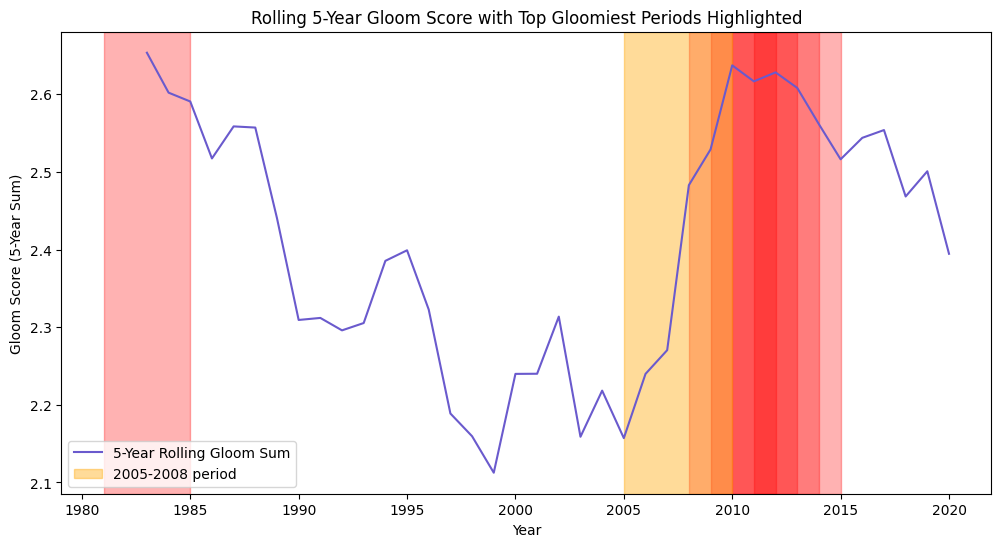

In [108]:
import matplotlib.pyplot as plt

# Plot rolling 5-year gloom sum
plt.figure(figsize=(12,6))
plt.plot(yearly_gloom['year'], yearly_gloom['gloom_5yr_sum'], label='5-Year Rolling Gloom Sum', color='slateblue')

# Highlight top 5 gloomiest periods
top_years = top_gloom['year']
for y in top_years:
    plt.axvspan(y-2, y+2, color='red', alpha=0.3)

# Highlight 2005-2010 period explicitly
plt.axvspan(2005, 2010, color='orange', alpha=0.4, label='2005-2008 period')

plt.xlabel('Year')
plt.ylabel('Gloom Score (5-Year Sum)')
plt.title('Rolling 5-Year Gloom Score with Top Gloomiest Periods Highlighted')
plt.legend()
plt.show()


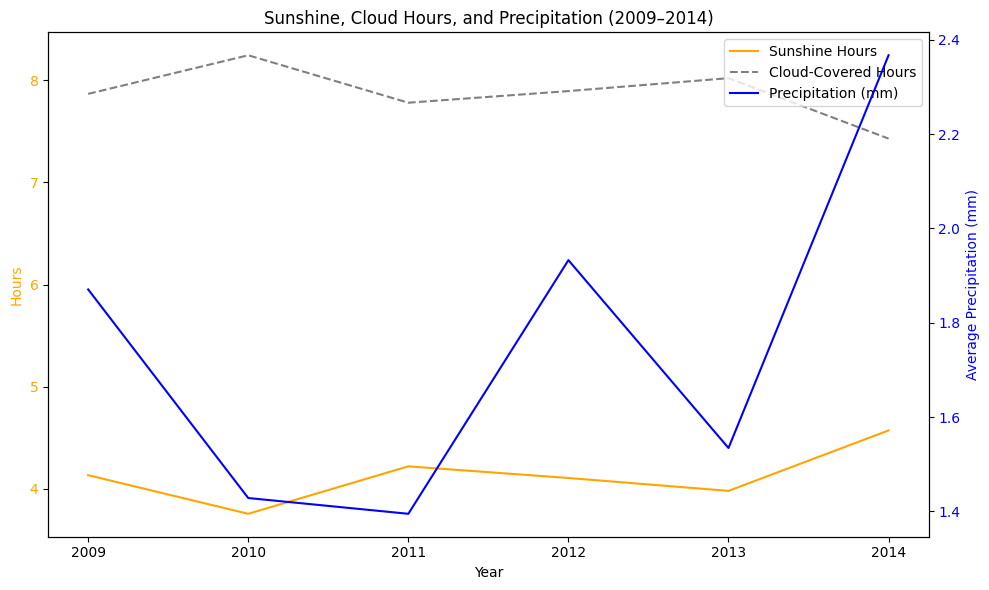

In [97]:
import matplotlib.pyplot as plt

# Filter data for 2010–2015
df_period = df[(df['year'] >= 2009) & (df['year'] <= 2014)].copy()

# Calculate cloud hours per day (assuming 12 daylight hours)
df_period['cloud_hours'] = 12 - df_period['sunshine']

# Group by year and calculate average values
yearly_avg = df_period.groupby('year').agg({
    'sunshine': 'mean',
    'cloud_hours': 'mean',
    'precipitation': 'mean'
}).reset_index()

# Set up plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color_sun = 'orange'
color_cloud = 'gray'
color_precip = 'blue'

# Plot sunshine and cloud-covered hours on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Hours', color=color_sun)
ax1.plot(yearly_avg['year'], yearly_avg['sunshine'], color=color_sun, label='Sunshine Hours')
ax1.plot(yearly_avg['year'], yearly_avg['cloud_hours'], color=color_cloud, label='Cloud-Covered Hours', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color_sun)

# Plot precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Average Precipitation (mm)', color=color_precip)
ax2.plot(yearly_avg['year'], yearly_avg['precipitation'], color=color_precip, label='Precipitation (mm)')
ax2.tick_params(axis='y', labelcolor=color_precip)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Sunshine, Cloud Hours, and Precipitation (2009–2014)')
plt.tight_layout()
plt.show()


In [63]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month_name,weekday,month,season,rain_intensity,dtr,decade,daylight_hours,cloud_hours
0,01-01-1979,2,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,January,Monday,1,Winter,Light Rain,9.8,1970,12,5.0
1,02-01-1979,6,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,January,Tuesday,1,Winter,No Rain,9.1,1970,12,10.3
2,03-01-1979,5,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,January,Wednesday,1,Winter,No Rain,8.5,1970,12,12.0
3,04-01-1979,8,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,January,Thursday,1,Winter,No Rain,6.2,1970,12,12.0
4,05-01-1979,6,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,January,Friday,1,Winter,No Rain,7.0,1970,12,10.0


In [73]:
from sklearn.preprocessing import MinMaxScaler

# Copy and drop rows with missing values in required columns
df_radiance = df[['date', 'sunshine', 'cloud_cover', 'precipitation', 'year']].dropna().copy()

# Normalise features to 0–1 range
scaler = MinMaxScaler()
df_radiance[['sunshine_norm', 'cloud_norm', 'precip_norm']] = scaler.fit_transform(
    df_radiance[['sunshine', 'cloud_cover', 'precipitation']]
)

# Radiance: more sunshine, less cloud and rain
df_radiance['radiance_score'] = (
    df_radiance['sunshine_norm'] +
    (1 - df_radiance['cloud_norm']) +
    (1 - df_radiance['precip_norm'])
)


In [66]:
# Group by year, take mean radiance per year
yearly_radiance = df_radiance.groupby('year')['radiance_score'].mean().reset_index()

# Rolling average across 5-year windows
yearly_radiance['5yr_avg_radiance'] = yearly_radiance['radiance_score'].rolling(window=5).mean()

# Get top 5 periods
top5_radiance_periods = yearly_radiance.nlargest(5, '5yr_avg_radiance')
print(top5_radiance_periods[['year', '5yr_avg_radiance']])


    year  5yr_avg_radiance
36  2015          1.658153
35  2014          1.648266
37  2016          1.647101
39  2018          1.635718
38  2017          1.634785


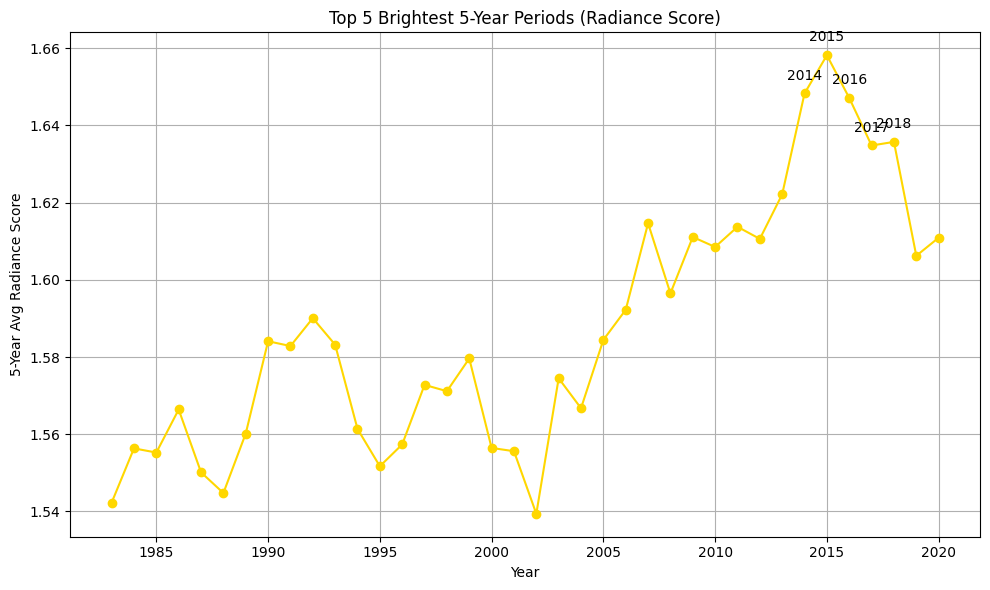

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format and extract year
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year

# Step 1: Normalise sunshine, cloud_cover, precipitation
df['sunshine_norm'] = (df['sunshine'] - df['sunshine'].min()) / (df['sunshine'].max() - df['sunshine'].min())
df['cloud_cover_norm'] = (df['cloud_cover'] - df['cloud_cover'].min()) / (df['cloud_cover'].max() - df['cloud_cover'].min())
df['precipitation_norm'] = (df['precipitation'] - df['precipitation'].min()) / (df['precipitation'].max() - df['precipitation'].min())

# Step 2: Calculate radiance score
df['radiance_score'] = df['sunshine_norm'] + (1 - df['cloud_cover_norm']) + (1 - df['precipitation_norm'])

# Step 3: Average radiance by year
yearly_radiance = df.groupby('year')['radiance_score'].mean().reset_index()

# Step 4: 5-year rolling average
yearly_radiance['5yr_avg_radiance'] = yearly_radiance['radiance_score'].rolling(window=5).mean()

# Step 5: Top 5 brightest periods
top5_radiance_periods = yearly_radiance.nlargest(5, '5yr_avg_radiance')

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_radiance['year'], yearly_radiance['5yr_avg_radiance'], marker='o', color='gold')
plt.title('Top 5 Brightest 5-Year Periods (Radiance Score)')
plt.xlabel('Year')
plt.ylabel('5-Year Avg Radiance Score')
plt.grid(True)

# Annotate top 5
for _, row in top5_radiance_periods.iterrows():
    plt.annotate(f"{int(row['year'])}", (row['year'], row['5yr_avg_radiance']), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()



In [75]:
df.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,dtr,decade,daylight_hours,cloud_hours,sunshine_norm,cloud_cover_norm,precipitation_norm,radiance_score,radiance_percent,radiance_label
0,1979-01-01,2,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,9.8,1970,12,5.0,0.43750,0.250,0.006472,2.181028,72.700917,Bright
1,1979-01-02,6,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,9.1,1970,12,10.3,0.10625,0.750,0.000000,1.356250,45.208333,Mixed
2,1979-01-03,5,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,8.5,1970,12,12.0,0.00000,0.625,0.000000,1.375000,45.833333,Mixed
3,1979-01-04,8,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,6.2,1970,12,12.0,0.00000,1.000,0.000000,1.000000,33.333333,Gloomy
4,1979-01-05,6,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,7.0,1970,12,10.0,0.12500,0.750,0.000000,1.375000,45.833333,Mixed


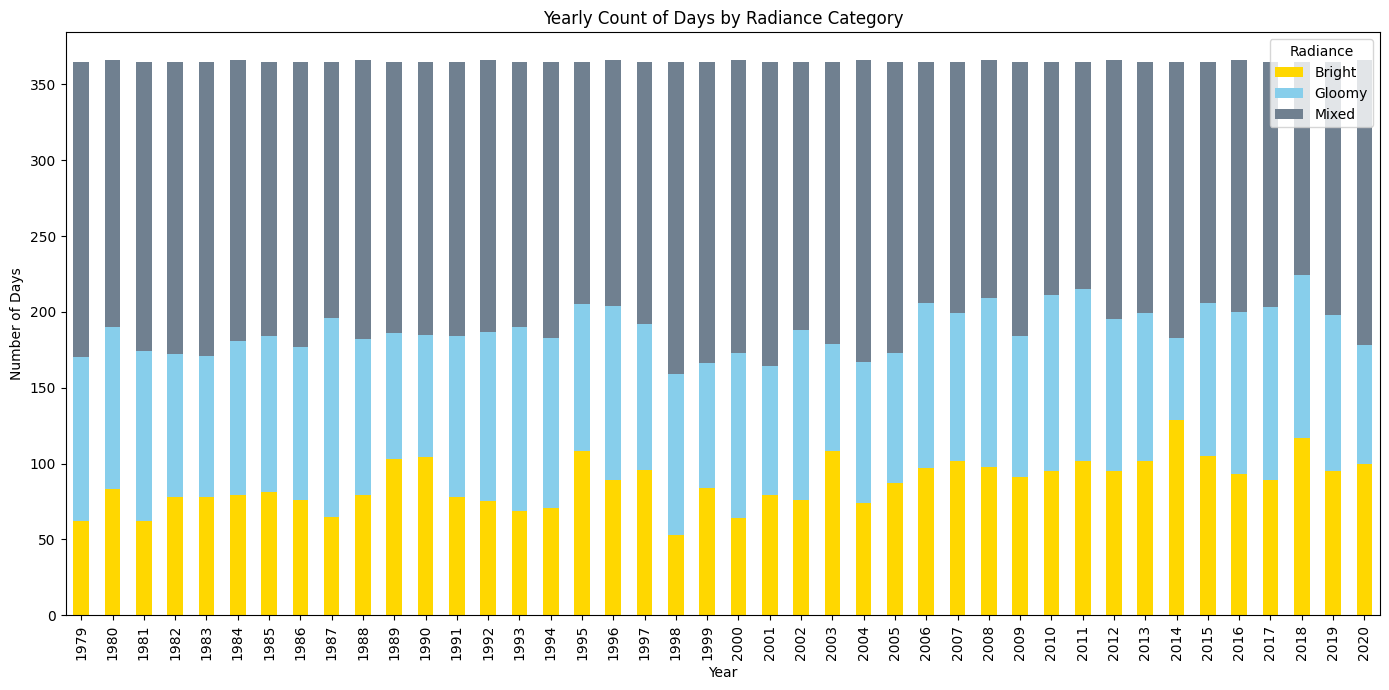

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'date' is datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Count of days per radiance label each year
radiance_counts = df.groupby(['year', 'radiance_label']).size().unstack(fill_value=0)

# (Optional) Convert counts to proportions per year
radiance_props = radiance_counts.div(radiance_counts.sum(axis=1), axis=0)

# Plot stacked bar chart of counts
radiance_counts.plot(kind='bar', stacked=True, figsize=(14,7), 
                     color=['#FFD700', '#87CEEB', '#708090'])  # gold, lightblue, slategray for bright, mixed, gloomy

plt.title('Yearly Count of Days by Radiance Category')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend(title='Radiance')
plt.tight_layout()
plt.show()

# If you want proportions instead, replace radiance_counts.plot with radiance_props.plot


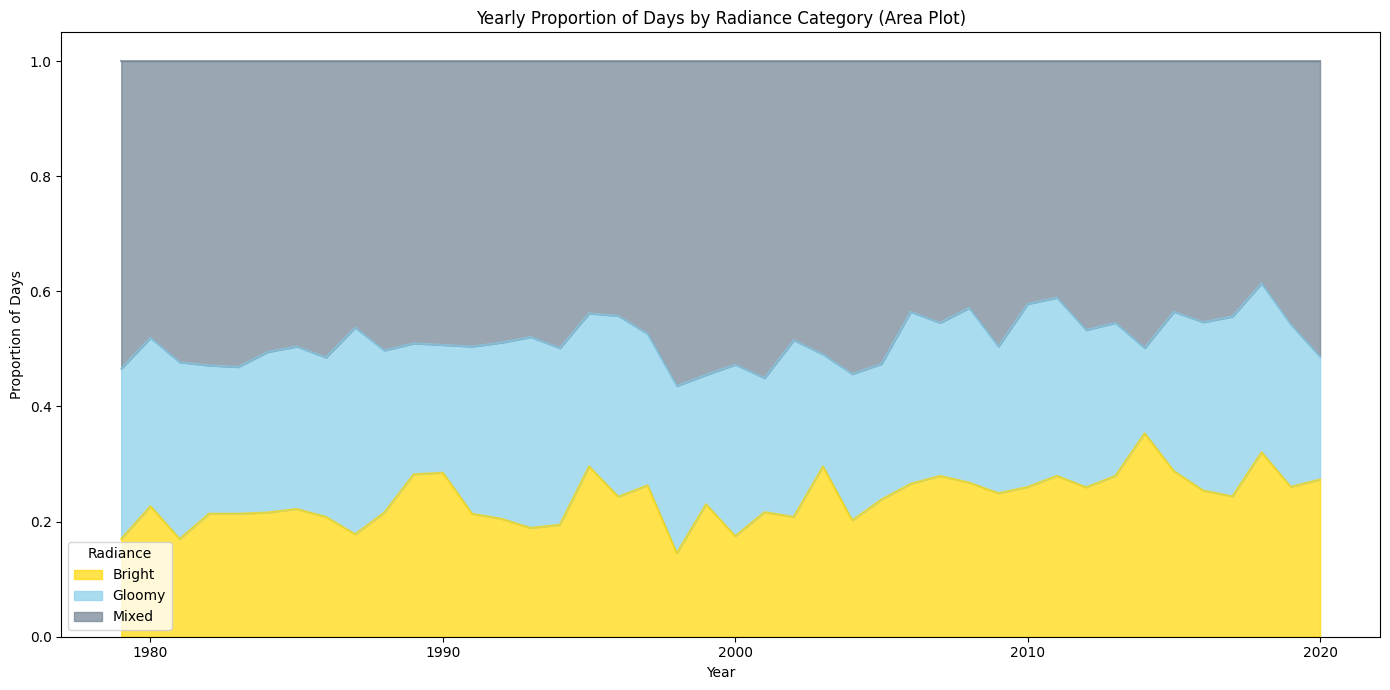

In [80]:
radiance_props.plot(kind='area', figsize=(14,7), 
                   color=['#FFD700', '#87CEEB', '#708090'], alpha=0.7)
plt.title('Yearly Proportion of Days by Radiance Category (Area Plot)')
plt.ylabel('Proportion of Days')
plt.xlabel('Year')
plt.legend(title='Radiance')
plt.tight_layout()
plt.show()

C:\Users\Julie\AppData\Local\Temp\ipykernel_13852\902013605.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('radiance_bin')['global_radiation'].mean()


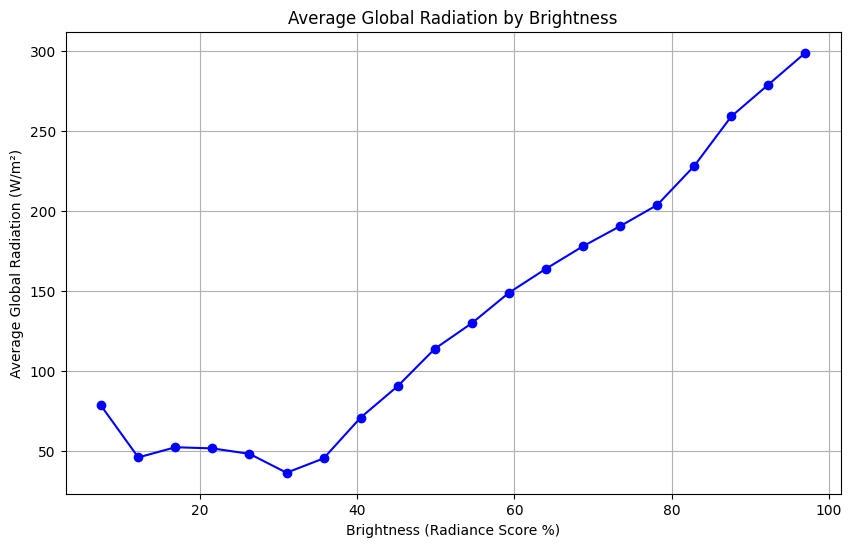

In [89]:
import numpy as np

df['radiance_bin'] = pd.cut(df['radiance_percent'], bins=20)
bin_means = df.groupby('radiance_bin')['global_radiation'].mean()

bin_centers = [interval.mid for interval in bin_means.index]

plt.figure(figsize=(10,6))
plt.plot(bin_centers, bin_means, marker='o', color='blue')
plt.xlabel('Brightness (Radiance Score %)')
plt.ylabel('Average Global Radiation (W/m²)')
plt.title('Average Global Radiation by Brightness')
plt.grid(True)
plt.show()


In [90]:
# Constants
area_heathrow = 12_000_000  # m² (approximate)
seconds_per_day = 24 * 3600  # seconds in one day

# Calculate daily energy in joules per m²
df['daily_energy_j_per_m2'] = df['global_radiation'] * seconds_per_day

# Calculate daily energy for Heathrow
df['daily_energy_j'] = df['daily_energy_j_per_m2'] * area_heathrow

# Total energy over the dataset period (joules)
total_energy_j = df['daily_energy_j'].sum()

# Convert to kWh
total_energy_kwh = total_energy_j / 3.6e6

print(f"Total solar energy received at Heathrow from {df['date'].min()} to {df['date'].max()}:")
print(f"{total_energy_kwh:,.0f} kWh")

Total solar energy received at Heathrow from 1979-01-01 00:00:00 to 2020-12-31 00:00:00:
525,621,108,635 kWh


In [91]:
# Approximate area of Heathrow Airport
area_heathrow_m2 = 12_000_000  # 12 km²

# Calculate daily rainwater volume in litres
df['daily_rain_litres'] = df['precipitation'] * area_heathrow_m2  # 1mm = 1L/m²

# Total rainfall from 1979 to 2020
total_rain_litres = df['daily_rain_litres'].sum()

# Optional: convert to cubic metres (1,000L = 1m³) or Olympic pools (2.5M L per pool)
total_rain_m3 = total_rain_litres / 1_000
olympic_pools = total_rain_litres / 2_500_000

# Display results
print(f"💧 Total rainwater received by Heathrow from {df['date'].min().date()} to {df['date'].max().date()}:")
print(f"{total_rain_litres:,.0f} litres")
print(f"Or roughly {total_rain_m3:,.0f} m³ (cubic metres)")
print(f"That’s equivalent to about {olympic_pools:,.0f} Olympic swimming pools!")


💧 Total rainwater received by Heathrow from 1979-01-01 to 2020-12-31:
307,223,940,000 litres
Or roughly 307,223,940 m³ (cubic metres)
That’s equivalent to about 122,890 Olympic swimming pools!


In [92]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,sunshine_norm,cloud_cover_norm,precipitation_norm,radiance_score,radiance_percent,radiance_label,radiance_bin,daily_energy_j_per_m2,daily_energy_j,daily_rain_litres
0,1979-01-01,2,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,0.43750,0.250,0.006472,2.181028,72.700917,Bright,"(71.095, 75.809]",4492800.0,5.391360e+13,4800000.0
1,1979-01-02,6,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,0.10625,0.750,0.000000,1.356250,45.208333,Mixed,"(42.816, 47.529]",2332800.0,2.799360e+13,0.0
2,1979-01-03,5,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,0.00000,0.625,0.000000,1.375000,45.833333,Mixed,"(42.816, 47.529]",1123200.0,1.347840e+13,0.0
3,1979-01-04,8,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,0.00000,1.000,0.000000,1.000000,33.333333,Gloomy,"(28.676, 33.389]",1123200.0,1.347840e+13,0.0
4,1979-01-05,6,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,0.12500,0.750,0.000000,1.375000,45.833333,Mixed,"(42.816, 47.529]",2505600.0,3.006720e+13,0.0


In [93]:
print(df.columns)

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'year', 'month_name', 'weekday', 'month', 'season', 'rain_intensity',
       'dtr', 'decade', 'daylight_hours', 'cloud_hours', 'sunshine_norm',
       'cloud_cover_norm', 'precipitation_norm', 'radiance_score',
       'radiance_percent', 'radiance_label', 'radiance_bin',
       'daily_energy_j_per_m2', 'daily_energy_j', 'daily_rain_litres'],
      dtype='object')


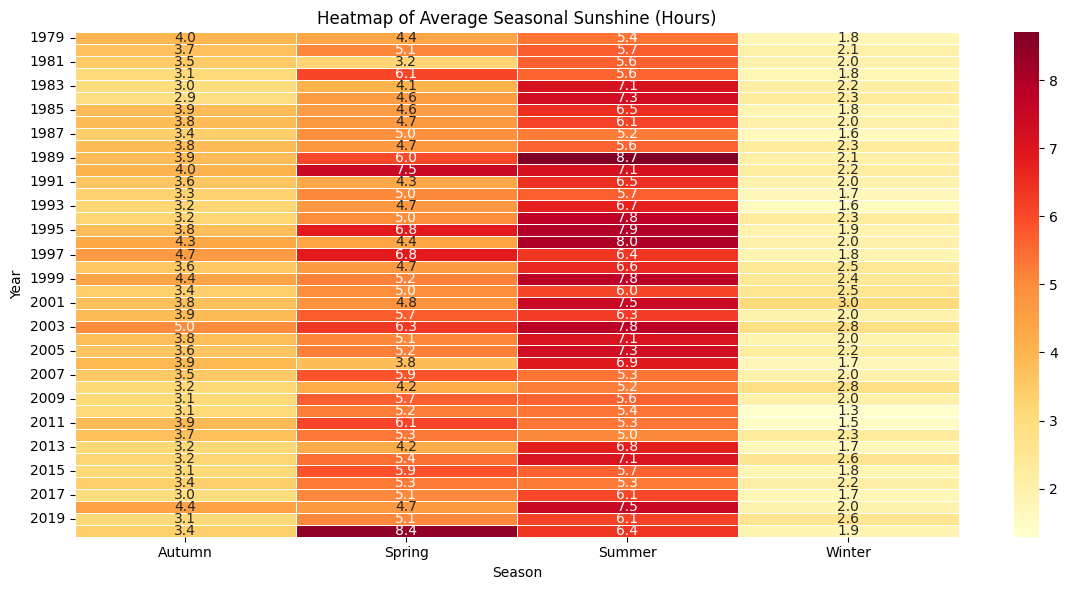

In [103]:
# Pivot to create a heatmap table
pivot = df.groupby(['year', 'season'])['sunshine'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap of Average Seasonal Sunshine (Hours)')
plt.ylabel('Year')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

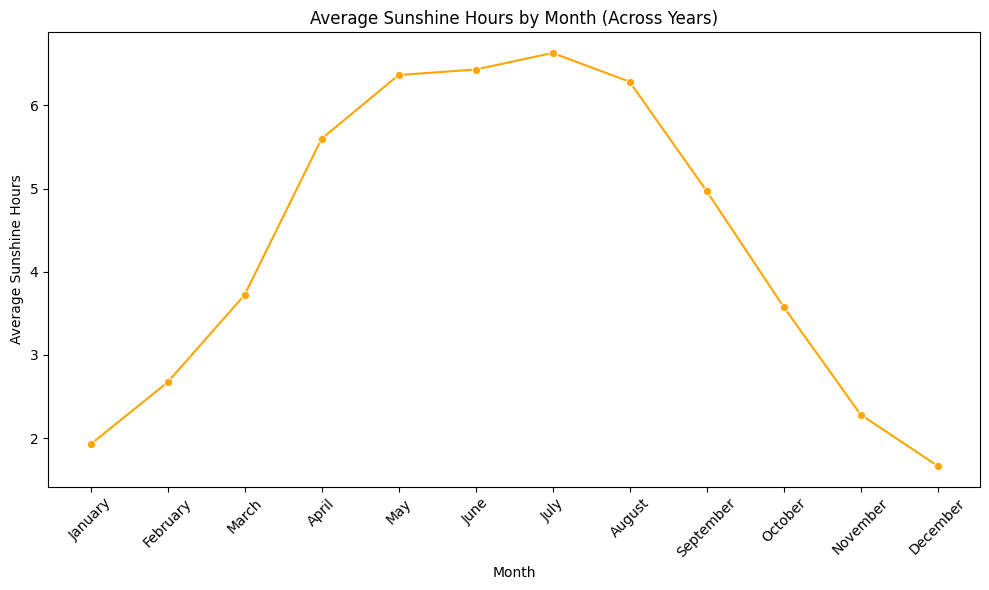

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and calculate average sunshine
monthly_sunshine = df.groupby('month')['sunshine'].mean().reset_index()

# Optional: If you want to order months by calendar order, ensure 'month' is numeric (1-12)
# And convert to month names if needed
import calendar
monthly_sunshine['month_name'] = monthly_sunshine['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sunshine, x='month_name', y='sunshine', marker='o', color='orange')
plt.title('Average Sunshine Hours by Month (Across Years)')
plt.xlabel('Month')
plt.ylabel('Average Sunshine Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

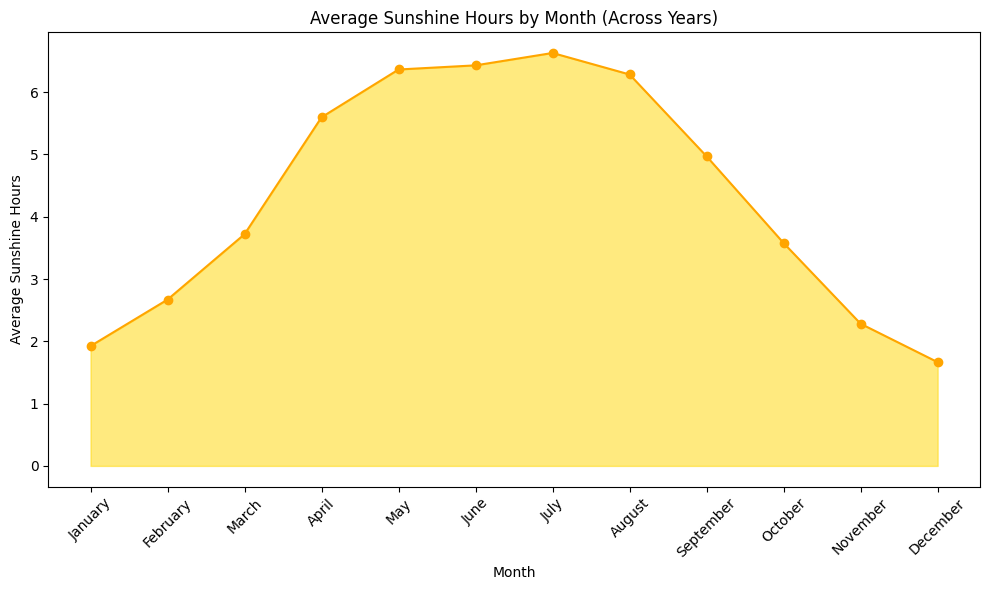

In [105]:
plt.figure(figsize=(10, 6))
plt.fill_between(monthly_sunshine['month_name'], monthly_sunshine['sunshine'], color='gold', alpha=0.5)
plt.plot(monthly_sunshine['month_name'], monthly_sunshine['sunshine'], marker='o', color='orange')
plt.title('Average Sunshine Hours by Month (Across Years)')
plt.xlabel('Month')
plt.ylabel('Average Sunshine Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

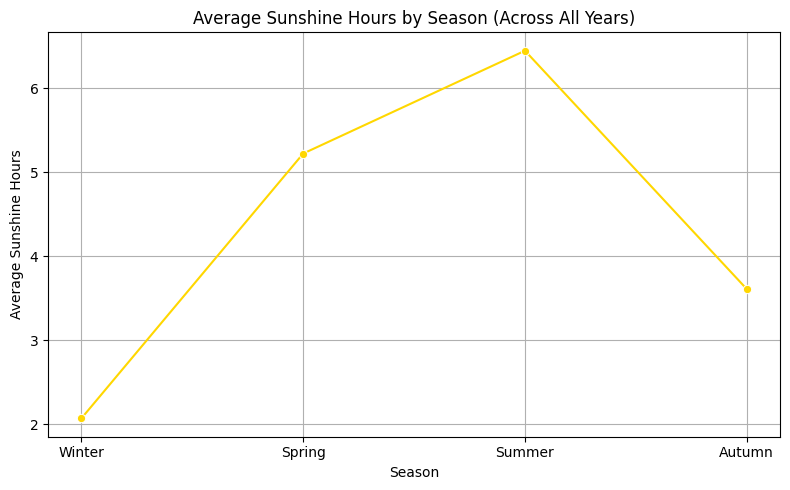

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by season and calculate average sunshine (across all years)
seasonal_sunshine = df.groupby('season')['sunshine'].mean().reset_index()

# 2. Order seasons logically
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_sunshine['season'] = pd.Categorical(seasonal_sunshine['season'], categories=season_order, ordered=True)
seasonal_sunshine = seasonal_sunshine.sort_values('season')

# 3. Plot line chart (similar to month plot)
plt.figure(figsize=(8,5))
sns.lineplot(data=seasonal_sunshine, x='season', y='sunshine', marker='o', color='gold')
plt.title('Average Sunshine Hours by Season (Across All Years)')
plt.xlabel('Season')
plt.ylabel('Average Sunshine Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
save_path = r"C:\Users\Julie\Desktop\London Weather\London Weather EDA\Day 3\FinalCleanDSLW.csv"
df.to_csv(save_path, index=False)